In [17]:
from algorithms import *
from snake_environment import *
from states_bracket import *

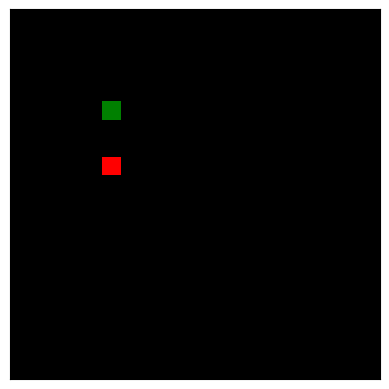

0
100


In [18]:
# Environment
env = SnakeEnv(render_mode="nonhuman")
# Bracketer
bracketer = FoodRelativePositionBraket()
# Sarsa
gamma = 0.9
lr_v = 0.15
SARSA_p = SARSA(env.action_space.n, gamma=gamma, lr_v=lr_v)
epsilon = 0.15

n_episodes = 200

performance_traj_SARSA = np.zeros(n_episodes)

state, _ = env.reset()

for i in range(n_episodes):

    done = False

    env.reset()
    state = bracketer.bracket(env._get_obs())
    action = SARSA_p.get_action_epsilon_greedy(state, eps = epsilon)

    while not done:

        new_s, reward, done, trunc, inf = env.step(action)
        new_s = bracketer.bracket(new_s)
        
        # Keeps track of performance for each episode
        performance_traj_SARSA[i] += reward
        
        new_a = SARSA_p.get_action_epsilon_greedy(new_s, epsilon)

        SARSA_p.single_step_update(state, action, reward, new_s, new_a, done)
        
        action = new_a
        state = new_s

        env.render()
    if i % 100 == 0:
        print(i)

env.close()

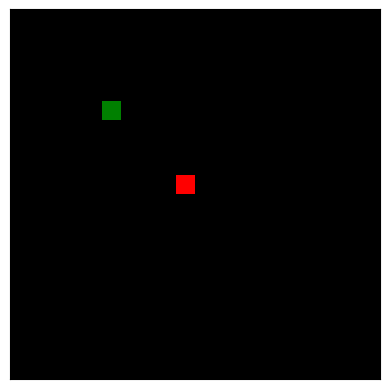

In [ ]:
done = False
env = SnakeEnv(render_mode="human")

while not done:
    action = SARSA_p.get_action_greedy(state)
    state, reward, done, trunc, inf = env.step(action)
    state = bracketer.bracket(state)
    env.render()

env.close()